In [46]:
using Plots
using Distributions
include("full_trait_distribution.jl")

Main.full_trait_distribution

In [47]:
pop = full_trait_distribution.init_population(4, [1,0.8,0.8,0.1], [0.0,0.0,2.0,3.0], 0.5 ,10, 1.0, 0.05, -10.0, 10, 0.1, 1.0)

Main.full_trait_distribution.population([0.0, 0.0, 38.400000000000006, 36.86400000000001], [2.1188192535093538e-28 2.1188192535093538e-28 2.1188192535093538e-28 2.1188192535093538e-28; 6.333537821830606e-28 6.333537821830606e-28 6.333537821830606e-28 6.333537821830606e-28; … ; 2.5158057769514047e-19 2.5158057769514047e-19 2.5158057769514047e-19 2.5158057769514047e-19; 1.0279773571668917e-19 1.0279773571668917e-19 1.0279773571668917e-19 1.0279773571668917e-19], [-10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1  …  9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], [0.0, 0.0, 2.0, 3.0], [1.0, 0.8, 0.8, 0.1], 4, 0.5, 10.0, [0.048557821270009946, 0.05129048610743099, 0.05414985409492424, 0.05714005040775946, 0.060265227497298776, 0.06352955806803286, 0.06693722761675013, 0.07049242653287514, 0.07419934176053282, 0.0780621480245016  …  0.19393155334169038, 0.186187695219304, 0.17866370200012444, 0.17135805889335734, 0.1642689919485795, 0.15739448212473717, 0.15073227938036604, 0

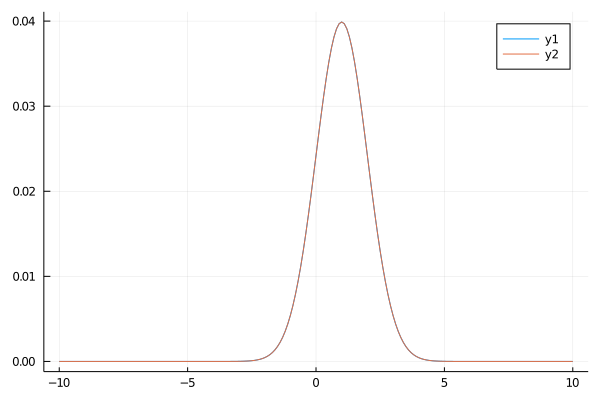

In [48]:
# check that convolutions are working
# inital distribution should match distribution after
# reproduction at equilibirum. 
Plots.plot(pop.grid,pop.trait[:,1])
dsn, F = full_trait_distribution.reproduction(pop)
Plots.plot!(pop.grid,dsn)

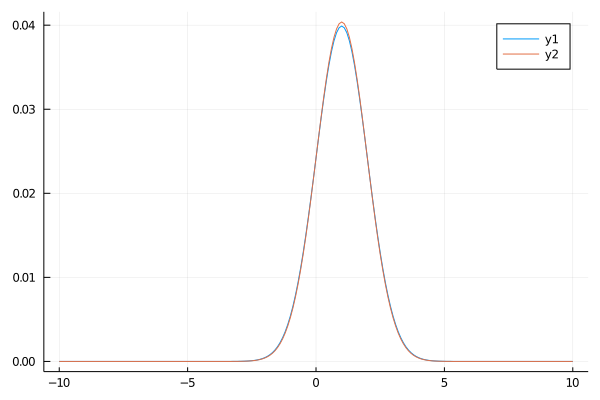

In [49]:
# check distriburiona after fecundity selection
# it should have the same center, but a tighter variance 
# due to stabalizing selection
Plots.plot(pop.grid,pop.trait[:,1])
dsn,f = full_trait_distribution.selection_and_reproduction(pop)
Plots.plot!(pop.grid,dsn)

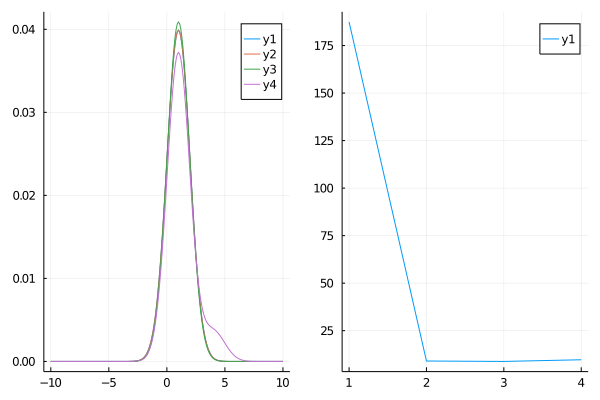

In [50]:
# plot abundace and distribution through life cycle
# initial values
N = zeros(4)
p1 = Plots.plot(pop.grid,pop.trait[:,3])

# reproduction
dsn, F = full_trait_distribution.reproduction(pop)
N[1] = F
Plots.plot!(p1, pop.grid, dsn)

# dentisy dependence
R = full_trait_distribution.recruitment(F, pop)
N[2] = R

# seleciton
dsn, R = full_trait_distribution.selection(dsn, R, pop)
N[3] = R
Plots.plot!(p1, pop.grid, dsn)

# immigration 
d_im = Distributions.Normal(4,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

dsn, R = full_trait_distribution.immigration(dsn, R, dsn_im, 0.1*R)
N[4] = R
Plots.plot!(p1, pop.grid, dsn)
p2 = Plots.plot(N)
plot(p1,p2)

In [85]:
 # immigration 
d_im = Distributions.Normal(5,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

R_im = 0.1

# define dynamics 
function update!(pop, dsn_im, R_im)

    # reproduction
    dsn, F = full_trait_distribution.reproduction(pop)
    # dentisy dependence
    R = full_trait_distribution.recruitment(F, pop)

    # seleciton
    dsn, R = full_trait_distribution.selection(dsn, R, pop)

    # immigration
    dsn, R = full_trait_distribution.immigration(dsn, R, dsn_im, R_im*R)
    
    # ageing!
    pop = full_trait_distribution.ageing!(pop, R, dsn)
    return pop
end


update! (generic function with 2 methods)

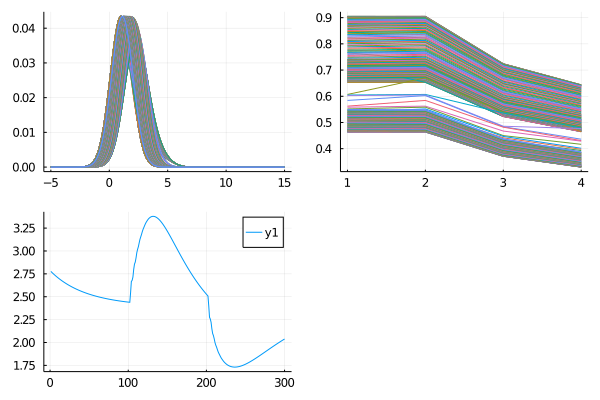

In [115]:
T = 100
pop = full_trait_distribution.init_population(4, [1,0.8,0.8,0.1], [0.0,0.0,2.0,3.0], 0.3 ,10, 1.0, 0.1, -5.0, 15, 0.1, 1.0)


# let population equilibrate 
# immigration 
d_im = Distributions.Normal(4.0,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

R_im = 0.0
for i in 1:100
    pop = update!(pop, dsn_im, R_im)  
end
# start plotting 
p1 = Plots.plot(pop.grid,pop.trait[:,1], legend = false)
p2 = Plots.plot(pop.abundance, legend = false)
N_acc = zeros(3*T)
R_im = 0.0
for i in 1:T
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 

R_im = 0.1
for i in 1:T
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i+T] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 

R_im = 0.0
for i in 1:T
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i+2*T] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 
p3 = Plots.plot(N_acc)
plot(p1,p2,p3)

In [37]:
v= [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [38]:
v[1:end-2] = v[2:end-1]
v

4-element Array{Int64,1}:
 2
 3
 3
 4

In [35]:
v[2:end-1]

2-element Array{Int64,1}:
 2
 3